# Introduction

This notebook will explore various shooting patterns of NBA players during the 2019-20 regular season. We will focus specifically on the profound use of the 3-point shot and the role it has played in the league's shift towards "positionless" basketball in recent years. We will create an assortment of plots to illustrate how players shot the ball this season and in the future, use this information to try to group players together based on their shooting skills. Hope you enjoy this visual analysis of shooting in the NBA in 2020!

# Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Data

In [39]:
# Import per-game statistics
per_game_stats = pd.read_csv('../Data/Raw/nba_2020_per_game.csv', index_col = 0)

In [40]:
per_game_stats.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [41]:
# Import shooting statistics
shooting_stats = pd.read_csv('../Data/raw/nba_2020_shooting.csv', index_col = 0)

In [42]:
shooting_stats.head()

,Pos,Age,Tm,G,MP,FG%,Dist.,2P Proportion,0-3 Proportion,3-10 Proportion,...,16-3P FG%,3P FG%,2P Proportion Astd,3P Proportion Astd,%FGA Dunks,# Dunks,%3PA Corner 3s,3P% Corner 3s,Att. Heaves,# Heaves
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,1680,0.592,4.4,0.994,0.513,0.397,...,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1
Bam Adebayo,PF,22,MIA,72,2417,0.557,5.8,0.982,0.481,0.301,...,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0
LaMarcus Aldridge,C,34,SAS,53,1754,0.493,13.7,0.802,0.202,0.129,...,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0
Kyle Alexander,PF,23,MIA,2,13,0.500,1.5,1.000,1.000,0.000,...,NaN,NaN,0.000,NaN,0.000,0,NaN,NaN,0,0
Nickeil Alexander-Walker,SG,21,NOP,47,591,0.368,15.9,0.500,0.244,0.173,...,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0


# Cleaning the Data

## Merging the 2 Data Frames into 1

In [43]:
stats = pd.concat([per_game_stats, shooting_stats.iloc[:, 6:]], axis = 1)

In [44]:
stats.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,16-3P FG%,3P FG%,2P Proportion Astd,3P Proportion Astd,%FGA Dunks,# Dunks,%3PA Corner 3s,3P% Corner 3s,Att. Heaves,# Heaves
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,...,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,...,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,...,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0
Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,...,NaN,NaN,0.000,NaN,0.000,0,NaN,NaN,0,0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,...,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0


In [45]:
stats.shape

(651, 49)

## Missing Values

In [46]:
stats.isnull().sum()

Pos                    0
Age                    0
Tm                     0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    2
3P                     0
3PA                    0
3P%                   35
2P                     0
2PA                    0
2P%                    6
eFG%                   2
FT                     0
FTA                    0
FT%                   33
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
Dist.                  2
2P Proportion          2
0-3 Proportion         2
3-10 Proportion        2
10-16 Proportion       2
16-3P Proportion       2
3P Proportion          2
2P FG%                 6
0-3 FG%               24
3-10 FG%              36
10-16 FG%             79
16-3P FG%             99


In our case, it probably makes the most sense to simply impute all of the missing values with 0, since it is likely that the reason that a particular shooting percentage (or total) is missing is that the player simply didn't register enough/any attempts in that category.

In [49]:
stats.fillna(0, inplace = True)
print("Missing values in the data: {}".format(stats.isnull().sum().sum()))

Missing values in the data: 0


There are now no missing values in the data, so we can move forward.

## Multiple Rows for the Same Player

In some cases, a player will have more than one row in the data (this is due to players switching teams mid-season and having a row for each team they've been apart of). Here, we'll replace these multiple rows with a single row containing the averages across all of the player's teams. (We could make this a weighted average, but since we shouldn't really expect players' averages to change immensely from one team to another)

In [55]:
df = stats.groupby(level = 0).mean().round(3)

Looks like we lost our categorical Position and Team columns in the process (this has to do with how the apply function works on a groupby object). Let's get those columns back in order below.

In [56]:
cat_features = ['Pos', 'Tm']

In [57]:
df = stats.groupby(level = 0).apply(lambda x: x.iloc[0])[cat_features].merge(df, left_index = True, right_index = True)

In [58]:
df.head()

,Pos,Tm,Age,G,GS,MP,FG,FGA,FG%,3P,...,16-3P FG%,3P FG%,2P Proportion Astd,3P Proportion Astd,%FGA Dunks,# Dunks,%3PA Corner 3s,3P% Corner 3s,Att. Heaves,# Heaves
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,PF,ORL,24.0,62.0,62.0,32.5,5.4,12.4,0.437,1.2,...,0.162,0.308,0.500,0.890,0.124,88.0,0.177,0.333,6.0,0.0
Aaron Holiday,PG,IND,23.0,66.0,33.0,24.5,3.5,8.5,0.414,1.3,...,0.407,0.394,0.288,0.839,0.005,2.0,0.167,0.432,1.0,0.0
Abdel Nader,SF,OKC,26.0,55.0,6.0,15.8,2.2,4.8,0.468,0.9,...,0.250,0.375,0.653,0.979,0.034,9.0,0.328,0.429,0.0,0.0
Adam Mokoka,SG,CHI,21.0,11.0,0.0,10.2,1.1,2.5,0.429,0.5,...,0.000,0.400,0.667,1.000,0.000,0.0,0.533,0.375,0.0,0.0
Admiral Schofield,SF,WAS,22.0,33.0,2.0,11.2,1.1,2.8,0.380,0.6,...,0.500,0.311,0.688,1.000,0.033,2.0,0.295,0.500,1.0,0.0


In [59]:
df.shape

(529, 49)

We now have 529 rows, as opposed to the original 651.

## Clean 'Pos' Column

In [60]:
# A few of the positions are not as clean as we would like
df['Pos'].value_counts()

SG       139
PF       101
PG        95
C         94
SF        89
SF-PF      4
SF-SG      3
C-PF       2
PF-C       2
Name: Pos, dtype: int64

We want to classify each player as one of the 5 textbook positions: PG, SG, SF, PF, C. No split position markers. Let's parse out the "-PF", etc. attached to some of the Pos tags.

In [63]:
df['Pos'] = df['Pos'].apply(lambda x: x.split('-')[0])

In [64]:
df['Pos'].value_counts()

SG    139
PF    103
C      96
SF     96
PG     95
Name: Pos, dtype: int64

## Set Games and Minutes Played Requirement

We really only want to consider those players who played for a statistically significant amount of time this season. (These cutoffs are somewhat arbitrary, we just want to filter out players who had very limited playing time.)

In [65]:
games_req = 40
mins_req = 15

In [66]:
df = df.loc[df['G'] >= games_req].loc[df['MP'] >= mins_req]

In [67]:
df.shape

(258, 49)

## Overview of Cleaned Data

Now all of our stats are gathered in one final, cleaned data frame, and we can work directly with this single df from here on out. Let's quickly look over this df:

In [68]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,16-3P FG%,3P FG%,2P Proportion Astd,3P Proportion Astd,%FGA Dunks,# Dunks,%3PA Corner 3s,3P% Corner 3s,Att. Heaves,# Heaves
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.00000,...,258.000000,258.00000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,26.046512,59.785523,35.651159,26.077264,4.540829,9.802969,0.466702,1.355938,3.722093,0.33631,...,0.365919,0.33631,0.530043,0.813969,0.069302,29.989667,0.233612,0.365159,1.223519,0.031008
std,4.067256,8.621445,24.637691,5.899320,2.073855,4.412027,0.068251,0.895764,2.285730,0.09185,...,0.155662,0.09185,0.194583,0.235631,0.099228,37.721323,0.151619,0.147527,1.661729,0.173676
min,19.000000,40.000000,0.000000,15.100000,1.300000,3.000000,0.333000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.099000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,55.000000,9.000000,21.150000,2.900000,6.300000,0.425250,0.700000,2.200000,0.32025,...,0.295000,0.32025,0.382750,0.742750,0.011000,4.000000,0.139500,0.316000,0.000000,0.000000
50%,26.000000,61.000000,36.500000,26.500000,4.100000,8.900000,0.450000,1.300000,3.500000,0.35550,...,0.387500,0.35550,0.541000,0.895000,0.035000,17.000000,0.211000,0.383500,1.000000,0.000000
75%,29.000000,66.000000,59.000000,30.800000,5.800000,12.575000,0.485500,1.975000,5.000000,0.38500,...,0.454500,0.38500,0.707750,0.971500,0.084000,37.750000,0.298000,0.436000,2.000000,0.000000
max,38.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,0.60000,...,1.000000,0.60000,0.897000,1.000000,0.616000,221.000000,1.000000,1.000000,11.000000,1.000000


In [69]:
df.columns

Index(['Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Dist.',
       '2P Proportion', '0-3 Proportion', '3-10 Proportion',
       '10-16 Proportion', '16-3P Proportion', '3P Proportion', '2P FG%',
       '0-3 FG%', '3-10 FG%', '10-16 FG%', '16-3P FG%', '3P FG%',
       '2P Proportion Astd', '3P Proportion Astd', '%FGA Dunks', '# Dunks',
       '%3PA Corner 3s', '3P% Corner 3s', 'Att. Heaves', '# Heaves'],
      dtype='object')

In [70]:
# Ouput cleaned data to new csv file
df.to_csv('../Data/Cleaned/nba_2020_shooting_stats_cleaned.csv')

# Visualizations

In [71]:
# Set style for ensuing plots
plt.style.use(['fivethirtyeight'])
sns.set_palette('hls')

Let's now do a quick visual overview of some of this season's shooting trends.

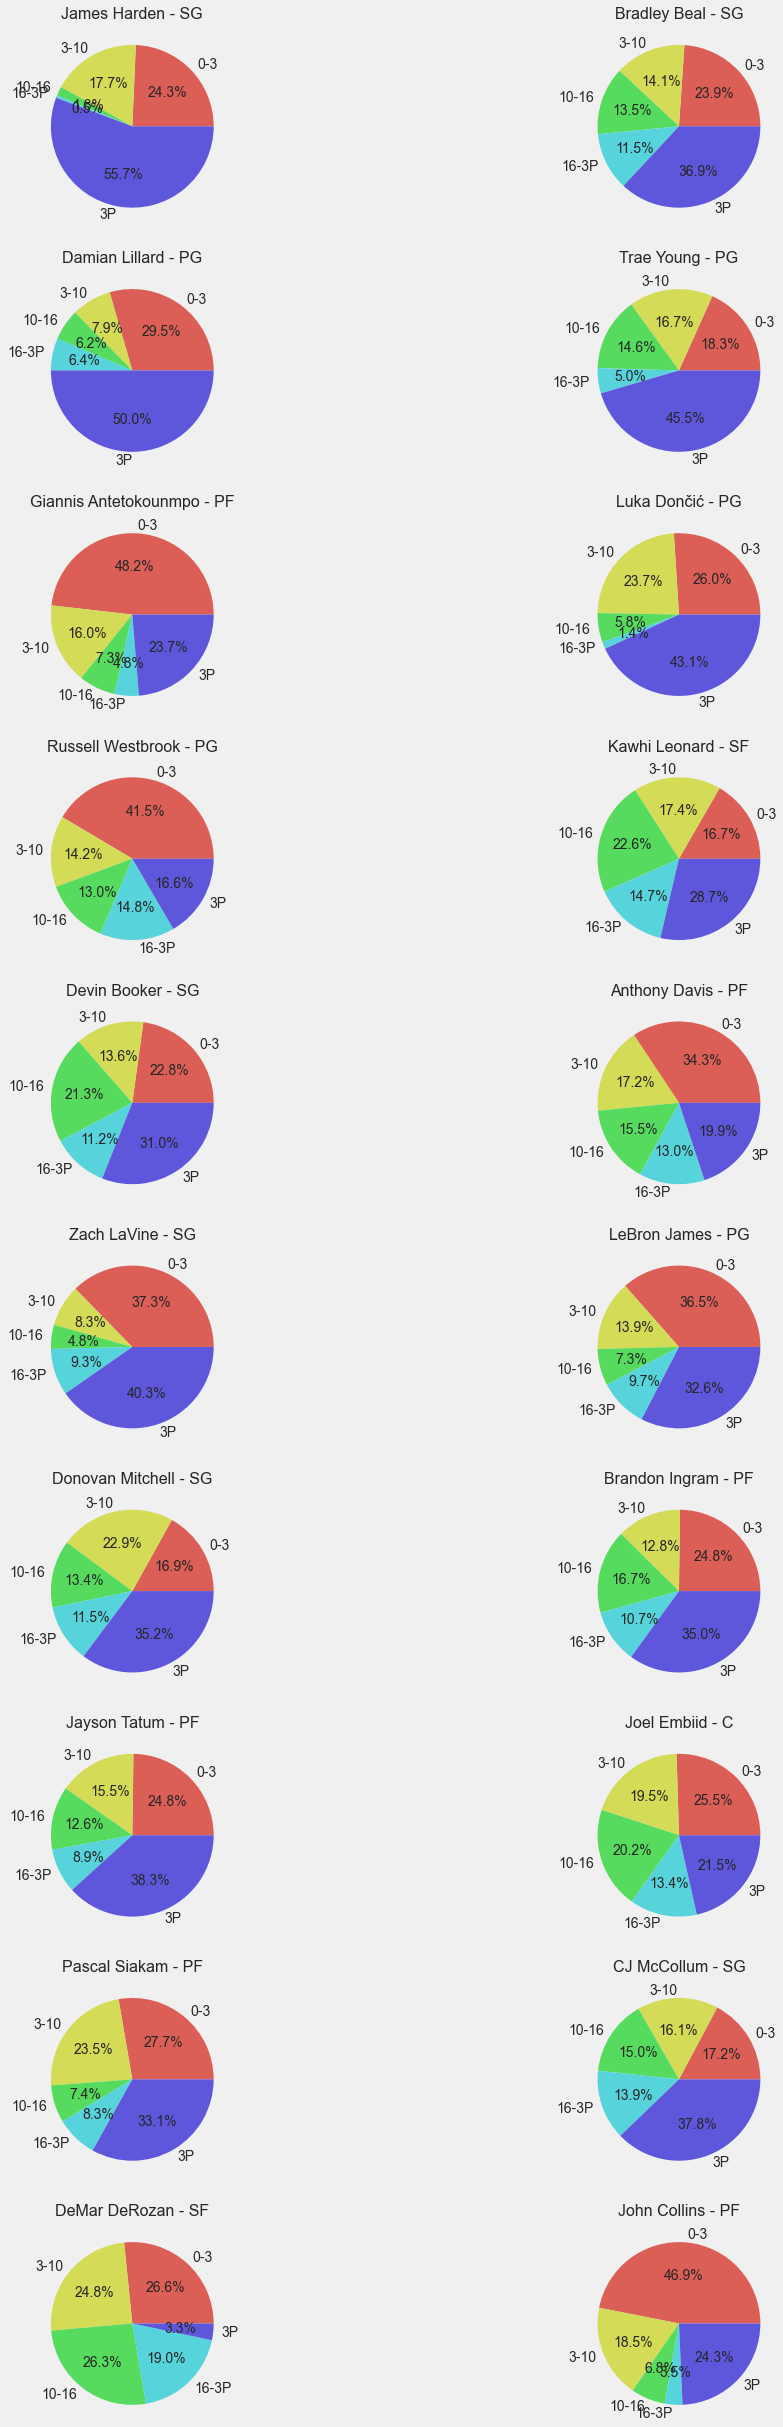

In [146]:
# How the top scorers got their buckets, broken down by shooting range
df_top_scorers = df.sort_values('PTS', ascending = False)[:20]
shooting_ranges = ['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']
shooting_range_labels = [x.replace(' Proportion', '') for x in shooting_ranges]

fig, axes = plt.subplots(10, 2, figsize = (16, 40))

for i, ax in enumerate(axes.flatten()):
    ax.pie(x = df_top_scorers[shooting_ranges].iloc[i], labels = shooting_range_labels, autopct="%.1f%%", radius = 1.5, normalize = True)
    ax.set_title(df_top_scorers.index[i] + ' - ' + df_top_scorers['Pos'][i], fontsize = 16, pad = 40)
    
fig.subplots_adjust(hspace = 0.8);

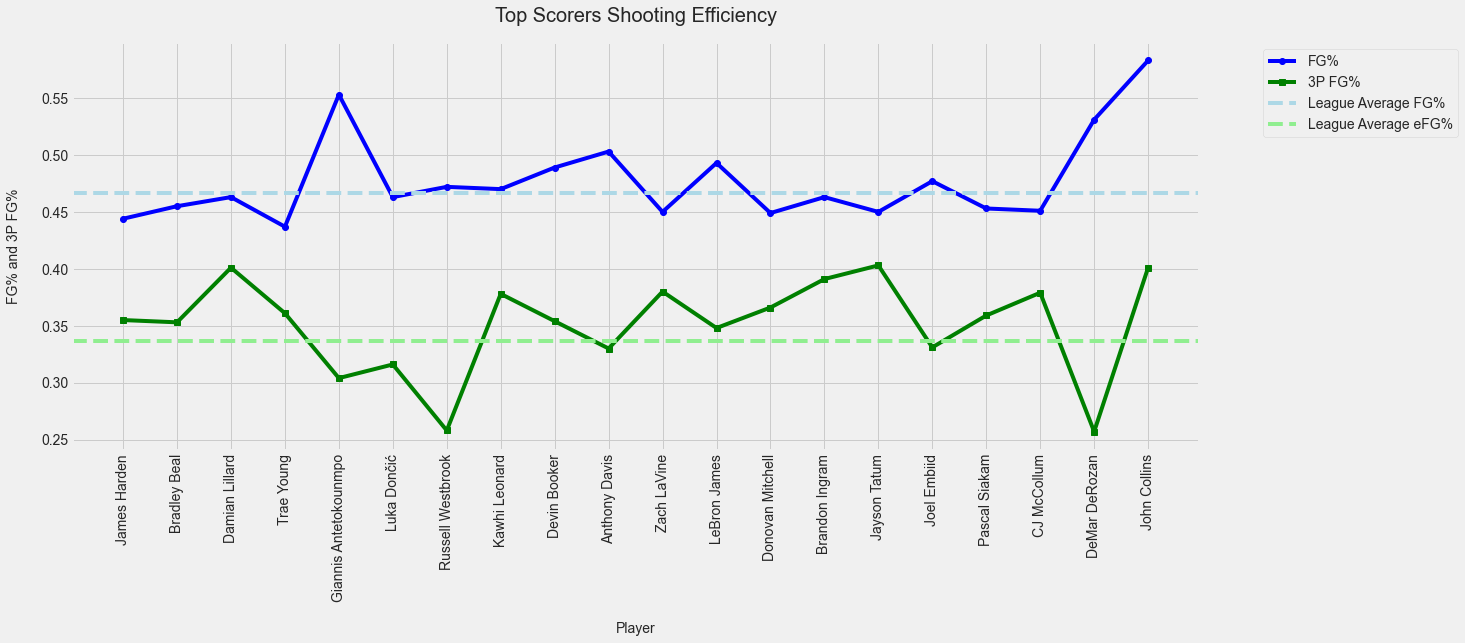

In [148]:
# How (relatively) efficient these top scorers were, specifically from 3
fig, ax = plt.subplots(figsize = (18, 7))

ax.plot('FG%', data = df_top_scorers, marker = 'o', color = 'blue')
ax.plot('3P FG%', data = df_top_scorers, marker = 's', color = 'green')
ax.axhline(y = np.mean(df['FG%']), linestyle = 'dashed', color = 'lightblue', label = 'League Average FG%')
ax.axhline(y = np.mean(df['3P FG%']), linestyle = 'dashed', color = 'lightgreen', label = 'League Average eFG%')

ax.set_xlabel('Player', fontsize = 14, labelpad = 20)
ax.set_ylabel('FG% and 3P FG%', fontsize = 14, labelpad = 20)
ax.set_xticks(df_top_scorers.index)
ax.set_xticklabels(df_top_scorers.index, rotation = 90)
ax.set_title("Top Scorers Shooting Efficiency", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

It almost looks like there's some sort of tradeoff between 3P FG% and overall FG%; those who shot at a high percentage from 3 rarely shot the best from the field overall, and vice versa. Maybe this is to be expected, since perhaps players who are better perimeter threats may see their overall FG% suffer a bit due to how many of their shots come from a long distance. Just how many 3s are some of these players taking? We'll look into that next.

In [74]:
df_3P_shooters = df[df['3PA'] >= 1]    # Set an attempts requirement

fig = px.scatter(df_3P_shooters, x = '3P Proportion', y = 'FG%', hover_data = [df_3P_shooters.index], color = 'Pos')
fig.update_layout(title_text = "Tradeoff between Chucking 3s and Overall FG%", title_x = 0.5)
fig.show();

Again, there appears to be a noticeable dropoff in field goal percentage when attempting lots of 3s. That is, some players are taking so many 3s that thier FG% as a whole ends up not looking all that impressive due to the fact that 3s are inherently less accurate shot attempts.

Here's a similar plot, illustrating a different metric, eFG%, rather than FG% (eFG% multiplies 3P FG% by 1.5, to account for the fact that 3 points is 1.5x as valuable as 2 points). Notice how the top scorers (the larger points) are located mostly in the upper center area of the plot. This emphasizes their versatility when it comes to scoring  and shows us why they are the star players of the league - they can be effective all around the court, setting them apart from other sets of players like 3-point specialists, relatively unskilled big men,  and the like. But more on different sets of players later...

In [142]:
fig = px.scatter(df_3P_shooters, x = '3P Proportion', y = 'eFG%', hover_data = [df_3P_shooters.index], size = 'PTS', color = 'Pos')
fig.update_layout(title_text = "Balancing Effect of eFG%", title_x = 0.5)
fig.show();

The plots above clearly show the effect the 3-point shot in today's NBA can have on a player's shooting profile; the eFG% metric has even become an almost universally known metric for defining player efficiency in response to the proliferation of 3s. Now let's take a closer look at the use (and sometimes misuse) of the 3-ball in particular.

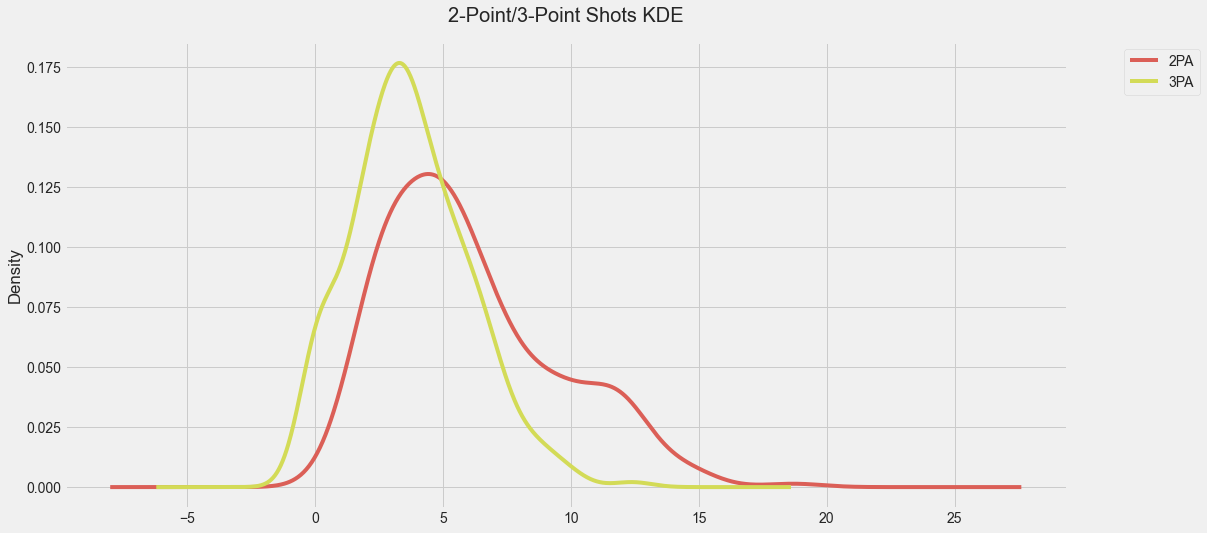

In [149]:
fig, ax = plt.subplots(figsize = (16, 8))

df[['2PA', '3PA']].plot.kde(ax = ax)

ax.set_title("2-Point/3-Point Shots KDE", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

The density curves for 2PA and 3PA are pretty close to each other here! Players are almost at the point where 3-point attempts match 2-point attempts - that is, almost every other shot they take is a 3 (almost). However, when it comes to other shot types, particularly mid-range shots, a whole different trend exists.

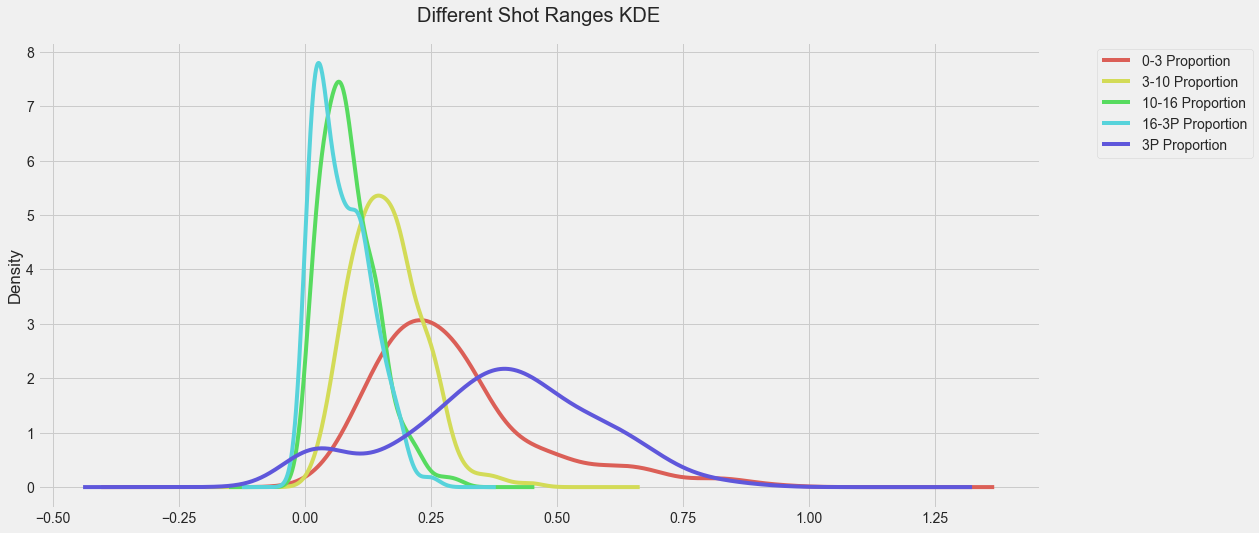

In [151]:
fig, ax = plt.subplots(figsize = (16, 8))

df[['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']].plot.kde(ax = ax)

ax.set_title("Different Shot Ranges KDE", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

Now, let's focus directly on which kinds of players are using and benefitting from the 3 the most. Are they all/mostly guards, as was the norm in the league for so many years? Or is it actually a mixed bag of players, a sign of the "positionless" revolution of recent seasons? 

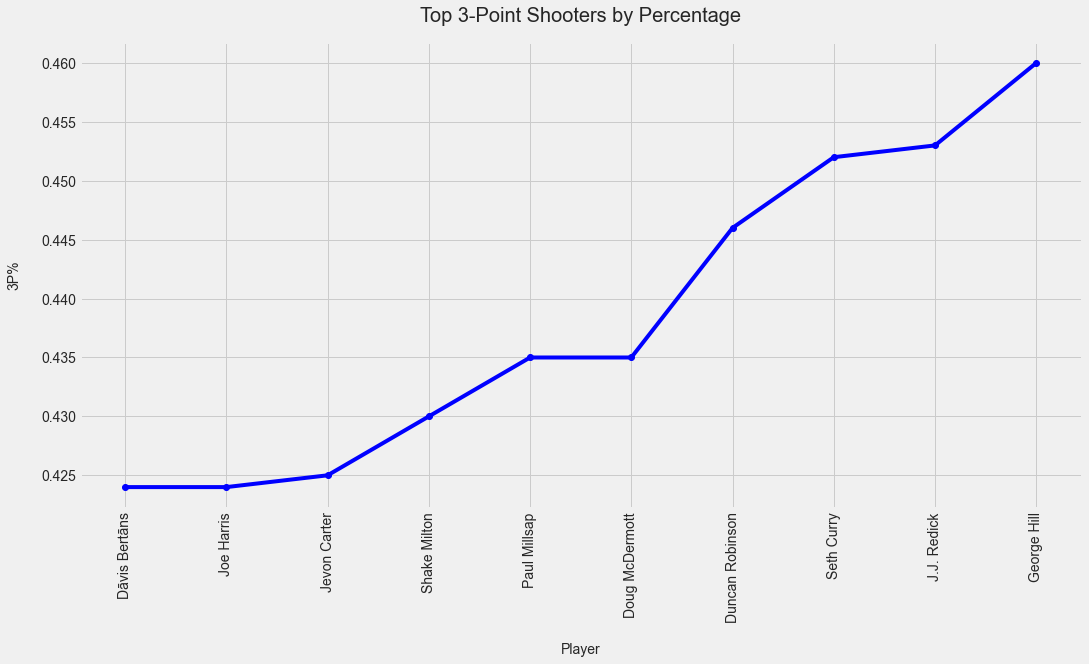

In [152]:
# The league's very best 3-point shooters
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot('3P FG%', data = df_3P_shooters.sort_values('3P FG%', ascending = False)[:10].iloc[::-1], marker = 'o', color = 'blue')

ax.set_xlabel('Player', fontsize = 14, labelpad = 20)
ax.set_ylabel('3P%', fontsize = 14, labelpad = 20)
ax.set_xticks(df_3P_shooters.index)
ax.set_xticklabels(df_3P_shooters.index, rotation = 90)
ax.set_title("Top 3-Point Shooters by Percentage", fontsize = 20, pad = 20)


plt.axis('tight');

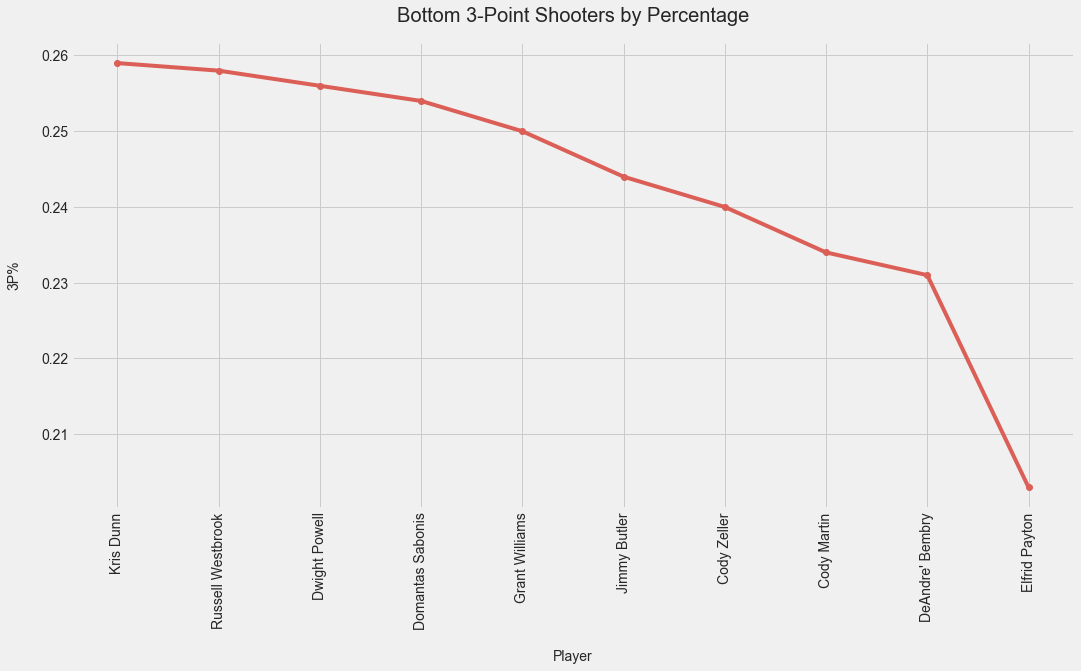

In [153]:
# The league's very worst 3-point shooters
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot('3P%', data = df_3P_shooters.sort_values('3P%', ascending = True)[:10].iloc[::-1], marker = 'o')
ax.set_xlabel('Player', fontsize = 14, labelpad = 20)
ax.set_ylabel('3P%', fontsize = 14, labelpad = 20)
ax.set_xticks(df_3P_shooters.index)
ax.set_xticklabels(df_3P_shooters.index, rotation = 90)
ax.set_title("Bottom 3-Point Shooters by Percentage", fontsize = 20, pad = 20)

plt.axis('tight');

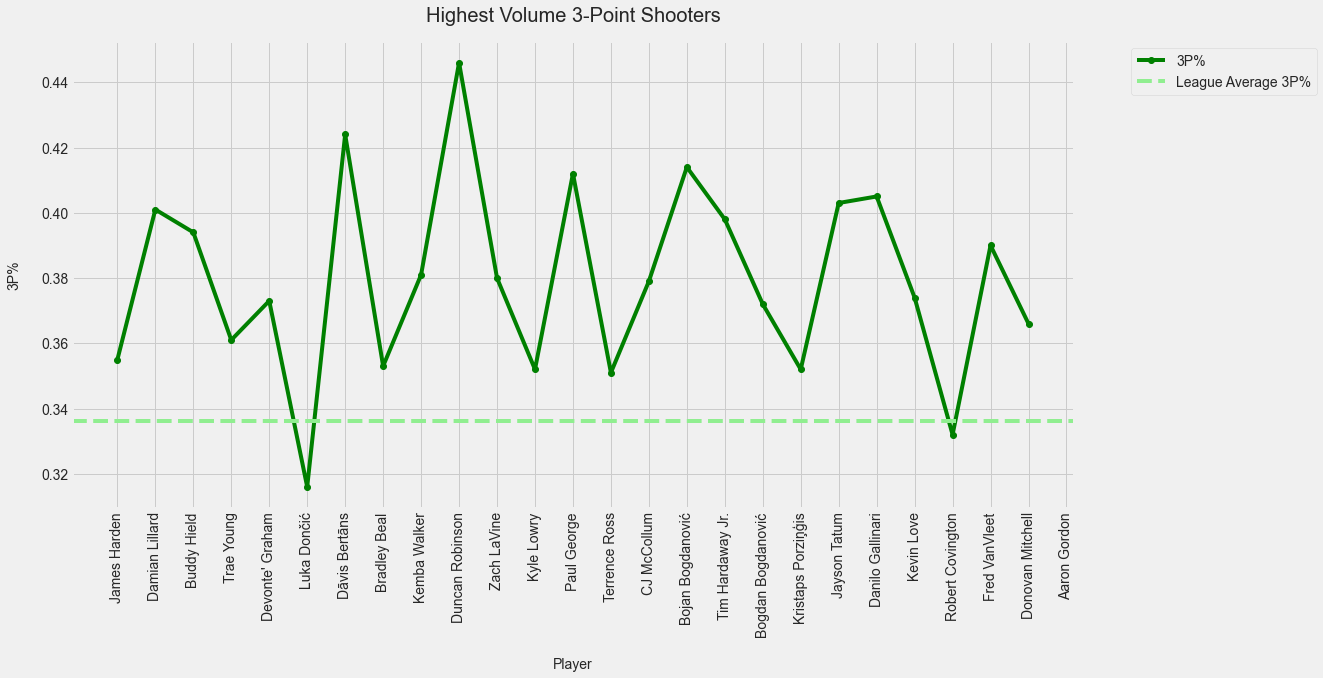

In [154]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot('3P%', data = df_3P_shooters.sort_values('3PA', ascending = False)[:25], marker = 'o', color = 'green')
ax.axhline(y = np.mean(df['3P%']), linestyle = 'dashed', label = "League Average 3P%", color = 'lightgreen')

ax.set_xlabel('Player', fontsize = 14, labelpad = 20)
ax.set_ylabel('3P%', fontsize = 14, labelpad = 20)
ax.set_xticks(df_3P_shooters.index)
ax.set_xticklabels(df_3P_shooters.index, rotation = 90)
ax.set_title("Highest Volume 3-Point Shooters", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

In [82]:
plt.figure()

fig = px.scatter(df_3P_shooters, x = '3PA', y = '3P%', hover_data = [df_3P_shooters.index], size = 'FGA', color = 'Pos')
fig.update_layout(title_text = "3-Point Percentage versus 3-Point Attempts", title_x = 0.5)
fig.show();

<Figure size 432x288 with 0 Axes>

Here, at a glance, we see a couple noteworthy things. We can notice that the league truly is shifting towards being "positionless" (at least in the case of 3-pointers). While a lot of centers still don't shoot the 3 too much, it is still a blurred line in 3-point attempts and percentages across the other 4 positions - look especially at the middle of the above plot, around 2-5 3PA, where all of the positions are blended together. 

We can even notice the traditional positions' losing their differentiating power by looking at the several preceding plots. Quite a few of the league-leading 3-point shooters are not your traditional smaller guards: look at Robinson(SF), Bertans(PF), McDermott(PF), Millsap(PF), and so on. (Side note: conversely, many of the worst shooters are actually guards)

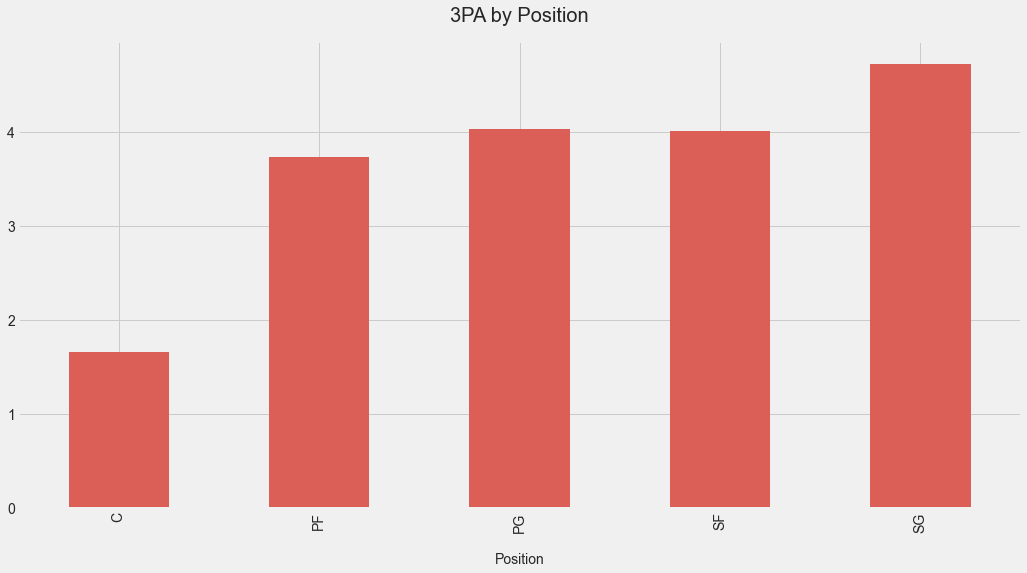

In [155]:
df_by_pos = df.groupby('Pos').apply(np.mean)

fig, ax = plt.subplots(figsize = (16, 8))

ax = df_by_pos['3PA'].plot.bar()
ax.set_xlabel('Position', fontsize = 14, labelpad = 20)
ax.set_title("3PA by Position", fontsize = 20, pad = 20)

plt.show();

It's becoming pretty difficult to discern between different positions looking at the shooting numbers. Imagine looking at this plot and trying to denote which bar corresponded to which position. Pretty difficult, apart from the Center bar. And isn't shooting arguably the most defining statistic? 

In the book, *Basketball on Paper* (which is basketball's version of Moneyball and an excellent book), Dean Oliver identified what he called the "Four Factors of Basketball Success":

- Shooting (40%)
- Turnovers (25%)
- Rebounding (20%)
- Free Throws (15%)

Shooting is the most important factor, followed by turnovers, rebounding, and free throws. The "Four Factors" were based on Oliver's extension research of the stats behind winning teams. He claims that shooting is the most important factor.

(source: https://www.breakthroughbasketball.com/stats/effective-field-goal-percentage.html)

On the other hand, consider how these similar plots - using two other stats mentioned in Oliver's four factors - may be used to distinguish across different positions:

Text(0.5, 1.0, 'Turnovers by Position')

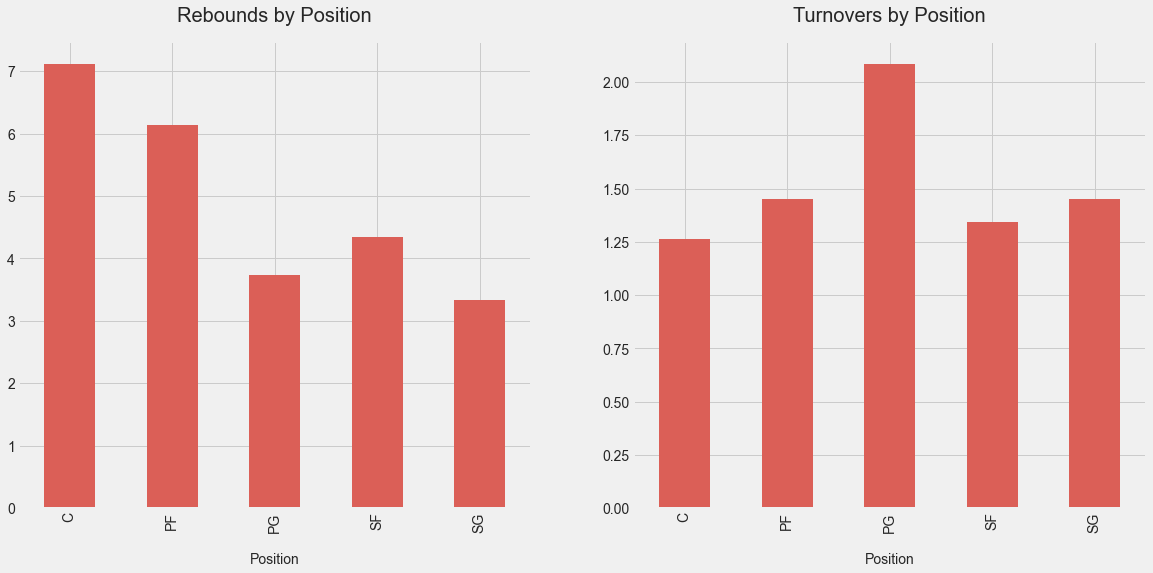

In [156]:
df_by_pos = df.groupby('Pos').apply(np.mean)

fig, axes = plt.subplots(1, 2, figsize = (18, 8))

df_by_pos['TRB'].plot.bar(ax=axes[0])
axes[0].set_xlabel('Position', fontsize = 14, labelpad = 20)
axes[0].set_title("Rebounds by Position", fontsize = 20, pad = 20)

df_by_pos['TOV'].plot.bar(ax=axes[1])
axes[1].set_xlabel('Position', fontsize = 14, labelpad = 20)
axes[1].set_title("Turnovers by Position", fontsize = 20, pad = 20)


Not perfect, but definitely more informative than the 3-point chart. Someone with moderate basketball knowledge could easily determine which bars correspond to the centers and power forwards in the rebounding chart, and the turnovers chart, if nothing else, show a clear gap between point guards and non-PGs.

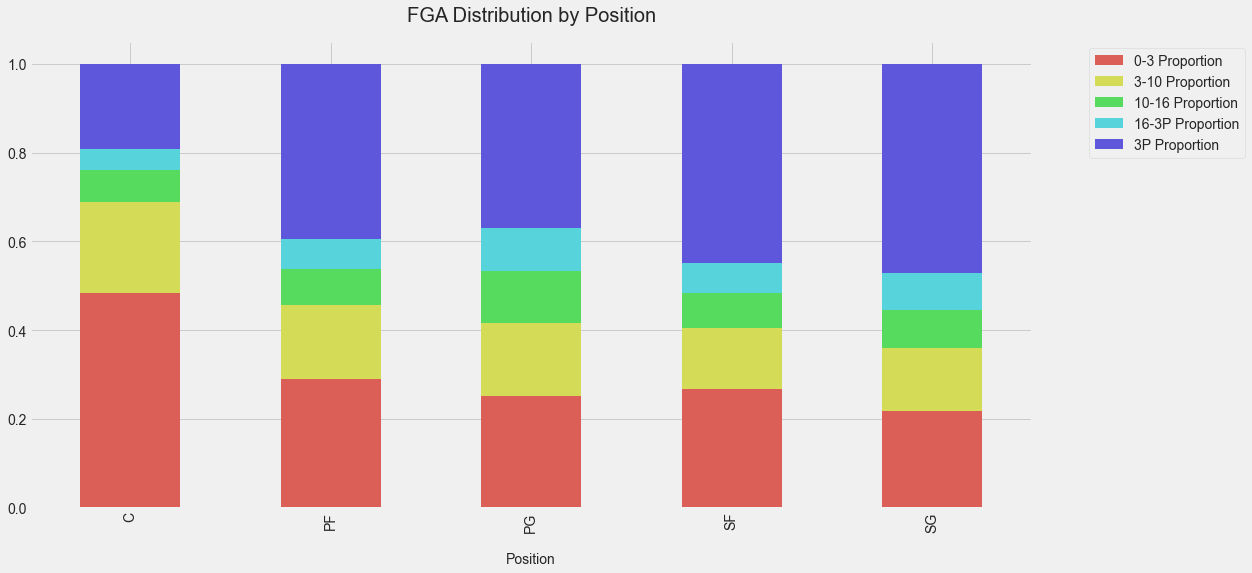

In [157]:
fig, ax = plt.subplots(figsize = (16, 8))

df_by_pos[['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']].plot.bar(stacked = True, ax = ax)

ax.set_xlabel('Position', fontsize = 14, labelpad = 20)
ax.set_title("FGA Distribution by Position", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

Having all of the shooting proportions doesn't exactly help us differentiate positions either. This final plot just serves to confirm the (partial) "positionlessness" of the NBA - a very mixed profile indeed. If only we had a better way to differentiate between unique sets of players...

# Conclusion

In summary, with the exception of the center position, positions really become blurred together when it comes to shot selection. The 3 has become so ingrained into the modern game that the traditional positions don't really encapsulate the different classes of players anymore. For example, look at these players who are both classified as power forwards: 
- Davis Bertans, who shot 8.7 of his 11.3 shots/game from 3-point range
- Domantas Sabonis, who shot 1.1 of his 13.7 shots/game from 3

Or, look at these rival, star point guards:
- Damian Lillard - 10.2 of 20.4 shots/game from 3
- Russell Westbrook - 3.7 of 22.5 shots/game from 3

So does it really make much sense to lump these sets of highly contrasting players into the same position when the way they score - and fundamentally, the way they play - is so different? To me, a position is meant to label a player's style of playing and how they contribute to the team. Think about positions in football (soccer): the positions roughly denote the location on the pitch that a player predominantly fills and controls. If we really think about it, this already exist at some level in basketball; some players are pretty exclusively 3-point shooters, waiting on the perimeter for spot-up looks, other players might be purely interior lob threats, etc. 

I think it would be neat to consider a roughly equivalent position system in basketball. That leads us to the next part of this project, which aims to boil down the different shooting tendencies of players into new categories, redefining the notion of positions in NBA basketball.